In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
submission = pd.read_csv('sample_submission.csv')

In [5]:
submission.head()

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296


In [6]:
test = pd.read_csv('test.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [8]:
df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [9]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [11]:
df.skew(numeric_only=True)

id                   0.000000
age                 -0.103579
hypertension         4.143196
heart_disease        6.316649
avg_glucose_level    3.037242
bmi                  0.713051
stroke               4.611121
dtype: float64

In [12]:
df.kurt(numeric_only=True)

id                   -1.200000
age                  -0.806880
hypertension         15.168056
heart_disease        37.905007
avg_glucose_level    13.176697
bmi                   1.362391
stroke               19.264951
dtype: float64

In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [14]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
df.select_dtypes(include=np.number).columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [16]:
df.gender.value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [17]:
df = df[df['gender']!='Other']

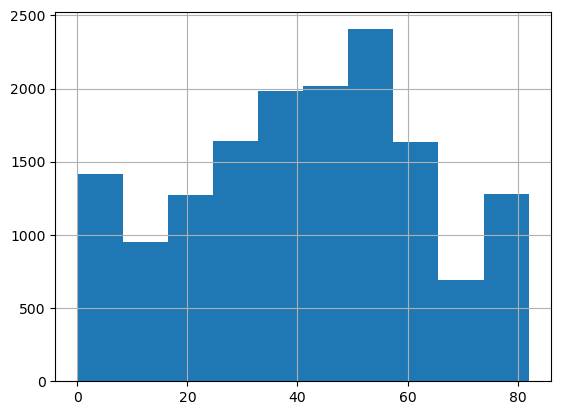

In [18]:
df.age.hist();

In [19]:
df.hypertension.value_counts()

0    14542
1      761
Name: hypertension, dtype: int64

In [20]:
df.ever_married.value_counts()

Yes    10385
No      4918
Name: ever_married, dtype: int64

In [21]:
df.work_type.value_counts()

Private          9752
children         2037
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [22]:
df.Residence_type.value_counts()

Rural    7663
Urban    7640
Name: Residence_type, dtype: int64

In [23]:
df.avg_glucose_level.nunique()

3740

In [24]:
df.bmi.nunique()

407

In [25]:
df.smoking_status.value_counts()

never smoked       6281
Unknown            4542
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [26]:
df.stroke.value_counts()

0    14671
1      632
Name: stroke, dtype: int64

In [27]:
df.avg_glucose_level.skew(), df.avg_glucose_level.apply(np.log10).skew()

(3.0372172890380242, 1.310846328183837)

In [28]:
df.bmi.skew(), df.bmi.apply(np.log10).skew()

(0.713113304687282, -0.09930010392966504)

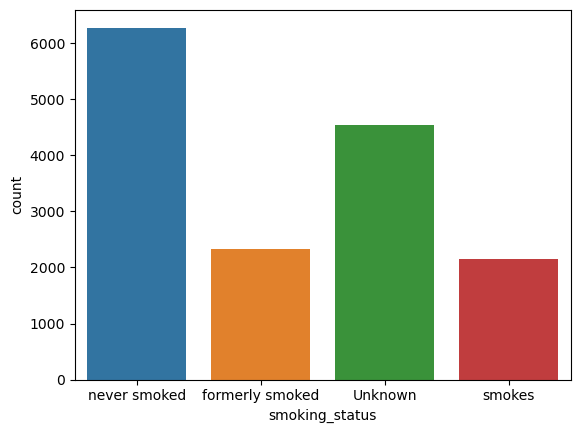

In [29]:
sns.countplot(x=df.smoking_status);

In [30]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
enc = LabelEncoder()

In [33]:
smoking_status = enc.fit_transform(df.smoking_status)
smoking_status

array([2, 1, 0, ..., 2, 0, 2])

In [34]:
gender = enc.fit_transform(df.gender)
gender

array([1, 1, 0, ..., 0, 1, 0])

In [35]:
ever_married = enc.fit_transform(df.ever_married)
ever_married

array([1, 1, 1, ..., 1, 1, 0])

In [36]:
work_type = enc.fit_transform(df.work_type)
work_type

array([2, 2, 2, ..., 3, 2, 2])

In [37]:
Residence_type = enc.fit_transform(df.Residence_type)
Residence_type

array([1, 0, 0, ..., 1, 0, 0])

In [38]:
df.smoking_status = smoking_status
df.gender = gender
df.ever_married  = ever_married
df.work_type =  work_type
df.Residence_type = Residence_type

In [39]:
X = df.drop(['stroke','id'],axis=1)
y = df['stroke']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [42]:
gnb.fit(X_train,y_train)

GaussianNB()

In [43]:
gnb.score(X_test,y_test)

0.9038159958180868

In [44]:
test['smoking_status'] = enc.fit_transform(test.smoking_status)

In [45]:
test['gender'] = enc.fit_transform(test.gender)
test['gender']

0        0
1        1
2        0
3        0
4        1
        ..
10199    0
10200    1
10201    0
10202    1
10203    0
Name: gender, Length: 10204, dtype: int32

In [46]:
test['ever_married'] = enc.fit_transform(test.ever_married)

In [47]:
test['work_type'] = enc.fit_transform(test.work_type)

In [48]:
test['Residence_type'] = enc.fit_transform(test.Residence_type)

In [49]:
predecit = gnb.predict(test.drop('id',axis=1))

In [50]:
predecit

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
submission['stroke'] =predecit

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
lr.score(X_test,y_test)

0.09847697881589978

In [55]:
(lr.predict(X_test)).min()

-0.08138132481167196

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rfr = RandomForestRegressor()

In [58]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
rfr.score(X_test,y_test)

0.06303711453447647

In [60]:
rfr.predict(X_test)

array([0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.  ])

# Exploring Data Analysis

In [61]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

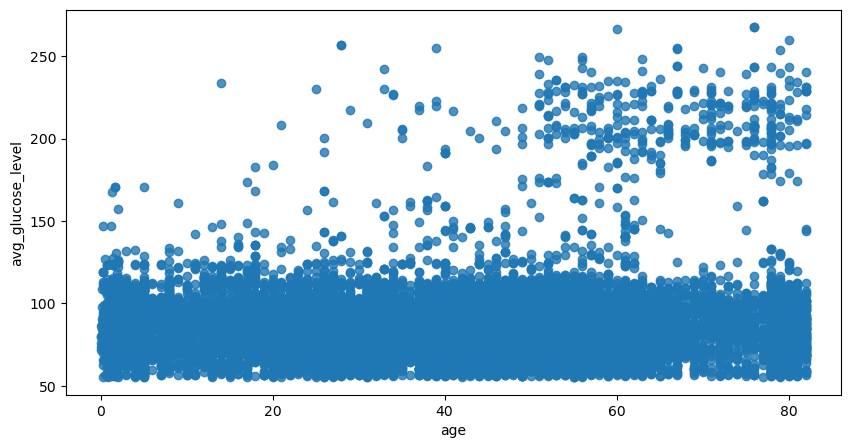

In [62]:
fig,axis = plt.subplots(figsize=(10,5));
sns.regplot(y=df.avg_glucose_level,
           x= df.age,
           data=df);

In [63]:
print('stope')

stope


In [64]:
df[df['stroke']==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
25,25,0,55.0,0,0,1,2,1,97.57,28.1,2,1
61,61,0,78.0,0,0,1,3,1,182.90,32.9,2,1
67,67,0,80.0,0,0,1,2,1,64.92,30.0,1,1
86,86,0,79.0,0,0,1,3,0,80.63,21.9,1,1
114,114,0,57.0,0,0,1,2,1,95.58,40.7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15225,15225,0,76.0,0,1,1,2,0,60.98,29.1,2,1
15246,15246,1,81.0,0,0,1,3,0,95.84,23.4,0,1
15250,15250,1,67.0,0,0,1,3,0,98.39,44.1,1,1
15275,15275,0,69.0,0,0,1,2,1,99.10,22.7,1,1


In [65]:
df[df['stroke']==1][df['age']>50]

C:\Users\ali\AppData\Local\Temp\ipykernel_7772\3141891915.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['stroke']==1][df['age']>50]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
25,25,0,55.0,0,0,1,2,1,97.57,28.1,2,1
61,61,0,78.0,0,0,1,3,1,182.90,32.9,2,1
67,67,0,80.0,0,0,1,2,1,64.92,30.0,1,1
86,86,0,79.0,0,0,1,3,0,80.63,21.9,1,1
114,114,0,57.0,0,0,1,2,1,95.58,40.7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15225,15225,0,76.0,0,1,1,2,0,60.98,29.1,2,1
15246,15246,1,81.0,0,0,1,3,0,95.84,23.4,0,1
15250,15250,1,67.0,0,0,1,3,0,98.39,44.1,1,1
15275,15275,0,69.0,0,0,1,2,1,99.10,22.7,1,1


In [66]:
df[df['stroke']==0][df['age']<10]

C:\Users\ali\AppData\Local\Temp\ipykernel_7772\1886549977.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['stroke']==0][df['age']<10]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
12,12,0,4.00,0,0,0,4,1,84.10,14.1,0,0
21,21,0,1.72,0,0,0,4,0,94.12,20.8,0,0
30,30,0,4.00,0,0,0,4,0,60.73,18.0,0,0
38,38,1,8.00,0,0,0,4,1,85.79,18.3,0,0
40,40,0,2.00,0,0,0,4,1,94.78,18.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15269,15269,1,1.88,0,0,0,4,1,104.55,18.9,0,0
15270,15270,0,0.72,0,0,0,4,0,108.18,19.1,0,0
15287,15287,0,5.00,0,0,0,4,0,94.33,18.2,0,0
15292,15292,0,0.32,0,0,0,4,1,89.04,17.8,0,0


In [67]:
len(df)

15303

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,28.0,0,0,1,2,1,79.53,31.1,2,0
1,1,1,33.0,0,0,1,2,0,78.44,23.9,1,0
2,2,0,42.0,0,0,1,2,0,103.00,40.3,0,0
3,3,1,56.0,0,0,1,2,1,64.87,28.8,2,0
4,4,0,24.0,0,0,0,2,0,73.36,28.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,0,22.0,0,0,0,0,1,72.63,19.5,2,0
15300,15300,0,46.0,1,0,1,2,1,101.19,32.1,2,0
15301,15301,0,75.0,0,0,1,3,1,87.69,26.2,2,0
15302,15302,1,46.0,0,0,1,2,0,101.13,22.5,0,0


In [69]:
submission

,id,stroke
0,15304,0
1,15305,1
2,15306,0
3,15307,0
4,15308,0
...,...,...
10199,25503,0
10200,25504,0
10201,25505,0
10202,25506,0


In [72]:
lr.predict(test.drop('id',axis=1))

array([ 0.06324574,  0.17640253, -0.00748234, ..., -0.01122783,
       -0.0207808 , -0.0305466 ])

In [73]:
submission['stroke']= lr.predict(test.drop('id',axis=1))

In [75]:
submission.to_csv('sub1.csv',index=False)

In [76]:
lr.score(X_test,y_test)

0.09847697881589978

In [77]:
df.skew().sort_values(ascending=False)

heart_disease        6.316427
stroke               4.610949
hypertension         4.143038
avg_glucose_level    3.037217
bmi                  0.713113
gender               0.482563
Residence_type       0.003006
id                   0.000072
age                 -0.103669
smoking_status      -0.120172
work_type           -0.196177
ever_married        -0.765058
dtype: float64

In [80]:
sub = pd.read_csv('sample_submission.csv')

In [ ]:
sub['stroke'] = 